# Final Project - MNIST Classifier

### Import Libraries

In [45]:
import torch.nn
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

### Download training and testing data

In [46]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5), (0.5))])

# Download torchvisioni datasets into respective folders
trainset = torchvision.datasets.MNIST('./train_set', download=True, train=True, transform=transform)
testset = torchvision.datasets.MNIST('./test_set', download=True, train=False, transform=transform)

# Use 64 unique images for each dataload
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

### Create dataloaders and visualize some examples

torch.Size([64, 1, 28, 28])
torch.Size([64])


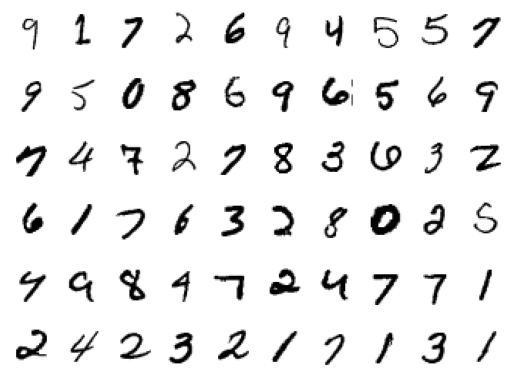

In [47]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

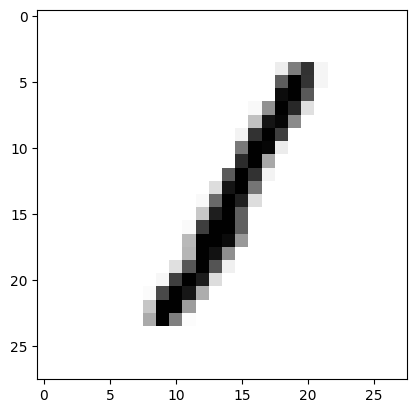

In [48]:
plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

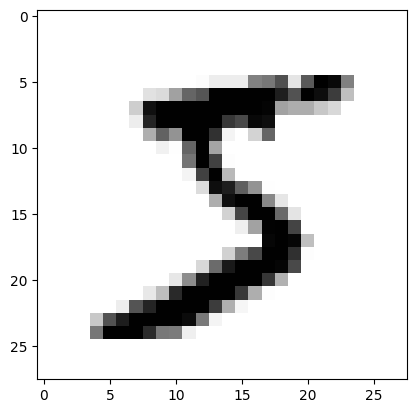

In [49]:
plt.imshow(trainset[0][0][0], cmap='gray_r')

### Model Initialization

In [50]:
# nn.Sequential is a type of nn.Module that allows for defining the nn in a sequential fashion
class Digit_Classifier(nn.Sequential):
  def __init__(self):
    super().__init__(
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5, padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(400, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10))

In [51]:
#Instantiate the model:
model = Digit_Classifier()

### Hyperparameters Tuning

In [52]:
#hyperparameters: currently all are set to 1, it is up to you to figure out what they should be
#Don't just randomly change the hyperparameters: consider what each of them are changing (look in the code to find where the actually affect things)
num_epochs = 3
lr = learning_rate = 0.001
criterion = nn.CrossEntropyLoss() #consider using other loss functions: https://pytorch.org/docs/stable/nn.html#loss-functions
# Using Adam model which is still a stochastic gradient descent like SDG but reacts faster.
# Adam is faster to converge. SGD is slower but generalizes better.
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

### Model Training

In [53]:
running_loss = []

#Training loop
model.train()
for i in range(num_epochs):
  for images, labels in trainloader:
    #zero out the gradients
    optimizer.zero_grad()

    #Calculate the output
    output = model(images)

    #Calculate the loss of the output, note: labels are the ACTUAL image labels, whereas output are your models guesses
    loss = criterion(output, labels)

    #Backpropagation (this is the part where we take the gradients [multivariable derivatives] of all the weights)
    loss.backward()

    #This is the part where we actually update the weights: how is learning_rate related to this step?
    optimizer.step()

### Save the model

In [54]:
#Save your model weights (this will generate a file that you will have to submit to us)
torch.save(model.state_dict(), 'model/weights.pth')

### Evaluate Test Accuracy

In [55]:
#model = Digit_Classifier()
#model.load_state_dict(torch.load('./model/weights.pth'))
model.eval()
correct = 0
total = 0

#ensure gradients won't get changed
with torch.no_grad():
  for i, (images, labels) in enumerate(testloader):

      output = model(images)
      value, predicted_label = torch.max(output, 1)

      # Increment correct out of total for correct label
      total += output.size(0)
      correct += torch.sum(predicted_label == labels)

print("Test accuracy: ", correct/total)

Test accuracy:  tensor(0.9833)
